# **IMPLEMENTATION DU FRAMEWORK DE MON ARTICLE DE BASE AVEC OPTIMISATION DE PARAMETRES PAR DETECTION D"ANOMALIES ET SELECTION AUTOMATIQUE DE VARIABLES**

## **Thème :** Apprentissage par ensemble pour la prédiction de la résistance à la compression des bétons de hautes performances (BHPs) 

### **Auteur** : ANANJOU TSAFACK Ornéla Stéla

### **Encadreurs**: Dr. TIOGNING Lauraine et Dr. MELATAGIA Paulin

## **I) Thématique**


*   **Thème** : Prédiction de la résistance mécanique des bétons de hautes performances (BHPs).

*   **Question Scientifique** : Quel modèle d'apprentissage par ensemble permet de prédire au mieux la résistance à la compression des BHPs?

*   **Objectif Scientifique** : Construire un modèle d'apprentissage par ensemble qui prédise efficacement la résistance à la compression des BHPs



##  **II) Données utilisées**

### **1) Informations sur les Données** :
Le jeu de donné provient de https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength sous
le nom de **Concrete Compressive Strength DataSet** .
Il compte **1030 observations** , **9 variables**( *ciment, scories de haut fourneaux, cendres volantes, l’eau, le super-plastifiant, les agrégats de coarse, les particules fines, l’âge* ) et une variable cible correspondant à la ***résistance mécanique***.


### **2) Présentation des données**

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression

In [3]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")
df.head(20)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [4]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


#### 1)La normalisation du dataset

In [5]:
# Normalisation z-score ou standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

normData=scaler.fit_transform(data)

normData

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

In [6]:
# Convertir le tableau obtenu en un dataframe
normData=pd.DataFrame(normData)
normData

,0,1,2,3,4,5,6,7,8
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733,-0.182649


In [7]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
curr_col_names = list(normData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = normData.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


In [8]:
normData.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,0.000000,2.759389e-17,3.587206e-16,-2.759389e-17,2.276496e-16,-1.931572e-16,2.069542e-17,2.759389e-16
std,1.000486e+00,1.000486,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-0.856886,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,-2.005443e+00
25%,-8.500258e-01,-0.856886,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,-7.252985e-01
50%,-7.912996e-02,-0.601776,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,-8.235105e-02
75%,6.589771e-01,0.800751,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,6.179613e-01
max,2.477918e+00,3.310688,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,2.801689e+00


#### 2) Separation du jeu de donnees entre les variables caracteristiques et la variable cible

In [9]:
# Ici on fractionne notre dataset et 90 et 10 comme l'article de base (leur dataset etait de 1228 exemples)
from sklearn.model_selection import train_test_split

X = normData.iloc[:,:-1]
y = normData.iloc[:,-1]

In [9]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(0)


In [10]:
# Fonction d'assistance pour entraîner et prédire le modèle IF pour une fonctionnalité
def train_and_predict_if(df, feature): 
    clf = IsolationForest(max_samples=300, random_state=42,contamination=0.1) 
    clf.fit(df[[feature]]) 
    pred = clf.predict(df [[feature]]) 
    scores = clf.decision_function(df[[feature]]) 
    stats = pd.DataFrame() 
    stats['val'] = df[feature] 
    stats['score'] = scores 
    stats['outlier' ] = pred 
    stats['min'] = df[feature].min() 
    stats['max'] = df[feature].max() 
    stats['mean'] = df[feature].mean() 
    stats['feature'] = [feature] * len(df) 
    # stats['outliers_number'] = len((stats.outlier==-1).value_counts())
    return stats

In [11]:
# Fonction d'assistance pour imprimer les valeurs aberrantes
def print_outliers(df,feature, n):
    print(feature) 
    print(df[feature].head(n).to_string(), "\n") 

#Parcourez toutes les fonctionnalités et enregistrez les scores aberrants pour chaque fonctionnalité
    num_columns = [i for i in list(df.columns) if i not in list(df.select_dtypes('object').columns) and i not in ['Id']]
    result = pd.DataFrame()
    for feature in num_columns:
        stats = train_and_predict_if(df, feature)
        result = pd.concat([result, stats])
        
# Rassemblez les principales valeurs aberrantes pour chaque fonctionnalité
    outliers = {team: grp.drop('feature', axis=1)
    for team, grp in result.sort_values(by='score').groupby('feature')}
    return outliers

In [12]:
stats_Cement = pd.DataFrame() 
stats_Blast = pd.DataFrame() 
stats_Fly = pd.DataFrame() 
stats_Water = pd.DataFrame() 
stats_Super = pd.DataFrame() 
stats_Coarse = pd.DataFrame() 
stats_Fine = pd.DataFrame() 
stats_Age = pd.DataFrame() 

In [13]:
stats_Cement=train_and_predict_if(X, "Cement")
stats_Cement

,val,score,outlier,min,max,mean,feature
0,2.477918,-0.124175,-1,-1.715219,2.477918,9.657862e-17,Cement
1,2.477918,-0.124175,-1,-1.715219,2.477918,9.657862e-17,Cement
2,0.491443,0.087536,1,-1.715219,2.477918,9.657862e-17,Cement
3,0.491443,0.087536,1,-1.715219,2.477918,9.657862e-17,Cement
4,-0.790432,0.060275,1,-1.715219,2.477918,9.657862e-17,Cement
...,...,...,...,...,...,...,...
1025,-0.045623,0.083940,1,-1.715219,2.477918,9.657862e-17,Cement
1026,0.392837,0.089618,1,-1.715219,2.477918,9.657862e-17,Cement
1027,-1.270057,0.073353,1,-1.715219,2.477918,9.657862e-17,Cement
1028,-1.168580,0.066619,1,-1.715219,2.477918,9.657862e-17,Cement


In [14]:

(stats_Cement.outlier==-1).value_counts()
# statistics.head(10)

False    927
True     103
Name: outlier, dtype: int64

In [15]:
print(stats_Cement.outlier==-1)

0        True
1        True
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: outlier, Length: 1030, dtype: bool


In [16]:
stats_Blast=train_and_predict_if(X, "BlastFurnaceSlag")

In [17]:
(stats_Blast.outlier==-1).value_counts()

False    927
True     103
Name: outlier, dtype: int64

In [18]:
#FlyAsh	Water	Superplasticizer	CoarseAggregate	FineAggregare	Age
stats_Fly=train_and_predict_if(X,"FlyAsh")

In [19]:
(stats_Fly.outlier==-1).value_counts()

False    927
True     103
Name: outlier, dtype: int64

In [20]:
stats_Water=train_and_predict_if(X,"Water")

In [21]:
(stats_Water.outlier==-1).value_counts()

False    940
True      90
Name: outlier, dtype: int64

In [22]:
stats_Super=train_and_predict_if(X,"Superplasticizer")

In [23]:
(stats_Super.outlier==-1).value_counts()

False    928
True     102
Name: outlier, dtype: int64

In [24]:
stats_Coarse=train_and_predict_if(X,"CoarseAggregate")

In [25]:
(stats_Coarse.outlier==-1).value_counts()

False    934
True      96
Name: outlier, dtype: int64

In [26]:
stats_Fine=train_and_predict_if(X,"FineAggregate")

In [27]:
(stats_Fine.outlier==-1).value_counts()

False    928
True     102
Name: outlier, dtype: int64

In [28]:
stats_Age=train_and_predict_if(X,"Age")

In [29]:
(stats_Age.outlier==-1).value_counts()


False    944
True      86
Name: outlier, dtype: int64

In [34]:
# Y=IsolationForest.decision_function(X)
# Y

#### 2) Fractionnment des donnees en jeu d'entrainement et de test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.27528757, 0.17856786, 0.12696106, 0.35115804, 0.2269144 ,
       0.23187746, 0.18277811, 0.33910944])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Water               0.351158
Age                 0.339109
Cement              0.275288
CoarseAggregate     0.231877
Superplasticizer    0.226914
FineAggregate       0.182778
BlastFurnaceSlag    0.178568
FlyAsh              0.126961
dtype: float64

<AxesSubplot: >

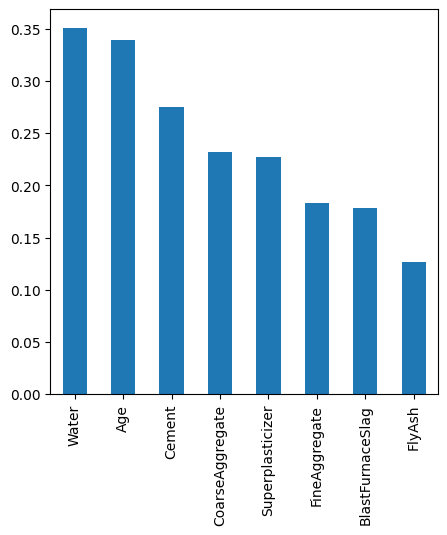

In [16]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5,5))

In [18]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=5)
selected_top_columns

SelectPercentile(percentile=5,
                 score_func=<function mutual_info_regression at 0x7f5b936e6e60>)

In [29]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Cement', 'Water', 'Superplasticizer', 'CoarseAggregate', 'Age'], dtype='object')

#### 3) Entrainement des différents modèles

##### **a) Random Forest**

Model				 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 Train 		 0.117 		 0.014 		0.073 		0.986
Random Forest Regressor 	 Test 		 0.310 		 0.096 		0.221 		0.899


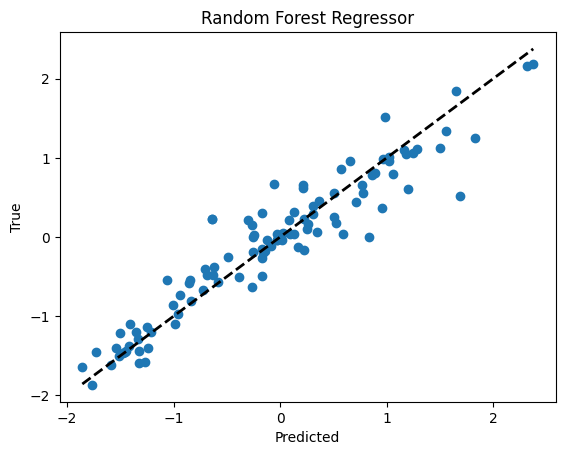

In [148]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from metrics.mean_poisson_deviance import mean_poisson_deviance
# from metrics.mean_gamma_deviance import mean_gamma_deviance 
# from metrics.max_error import max_error
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

y_pred_rfr = rfr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred,squared=False),mean_squared_error(y_train, y_train_pred),
            mean_absolute_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)))
print("""Random Forest Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_rfr, squared=False),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))


# afficher les resultats de predictions sur un graphe
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

##### **b) Extremely Randomised trees(Extra Trees)**

Model			 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Extra Trees Regressor	 Train 		 0.054 		 0.003 		0.004 		0.997
Extra Trees Regressor 	 Test 		 0.285 		 0.081 		0.193 		0.915


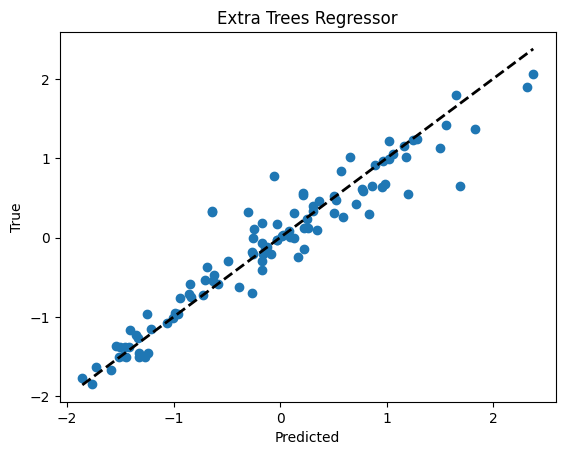

In [149]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
# y_pred_etr=etr.predict(X_test)
# etr_r2=etr.score(X_test,y_test)

# print("Model \t\t\t\t R2")
# print("Extra Trees Regressor \t\t{:.3f}".format(etr_r2))


# print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
# print("""Extra Trees Regressor \t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
#             np.sqrt(mean_squared_error(y_test, y_pred_etr)),mean_squared_error(y_test, y_pred_etr),
#             mean_absolute_error(y_test, y_pred_etr), r2_score(y_test, y_pred_etr)))

y_train_pred_etr = etr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

y_pred_etr = etr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Extra Trees Regressor\t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_etr,squared=False),mean_squared_error(y_train, y_train_pred_etr),
            mean_absolute_error(y_train, y_train_pred_etr), r2_score(y_train, y_train_pred_etr)))
print("""Extra Trees Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_etr, squared=False),mean_squared_error(y_test, y_pred_etr),
            mean_absolute_error(y_test, y_pred_etr), r2_score(y_test, y_pred_etr)))


# afficher les resultats de predictions sur un graphe
plt.scatter(y_test, y_pred_etr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Extra Trees Regressor")
plt.show()

##### **c) Adaptative Boosting(Adaboost)**

Model			 Phase 		 RMSE 		 MSE 		 MAE 		 R2
AdaBoost Regressor 	 Train 		 0.414 		 0.172 		0.346 		0.829
AdaBoost Regressor 	 Test 		 0.451 		 0.203 		0.369 		0.787


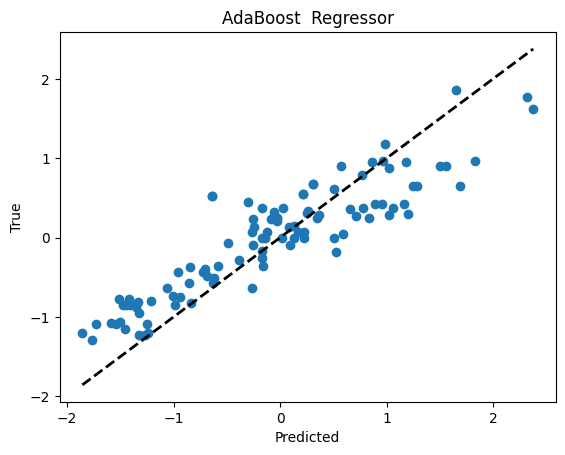

In [150]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred_abr=abr.predict(X_test)
# abr_r2=abr.score(X_test,y_test)

# print("Model \t\t\t\t R2")
# print("AdaBoost Regressor \t\t{:.3f}".format(abr_r2))

y_train_pred_abr = abr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""AdaBoost Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_abr,squared=False),mean_squared_error(y_train, y_train_pred_abr),
            mean_absolute_error(y_train, y_train_pred_abr), r2_score(y_train, y_train_pred_abr)))
print("""AdaBoost Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_abr, squared=False),mean_squared_error(y_test, y_pred_abr),
            mean_absolute_error(y_test, y_pred_abr), r2_score(y_test, y_pred_abr)))



plt.scatter(y_test, y_pred_abr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost  Regressor")
plt.show()

##### **d) Gradient Boosting Machine(GBM)**

Model				 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Gradient Boosting Regressor 	 Train 		 0.234 		 0.055 		0.176 		0.946
Gradient Boosting Regressor 	 Test 		 0.322 		 0.104 		0.239 		0.891


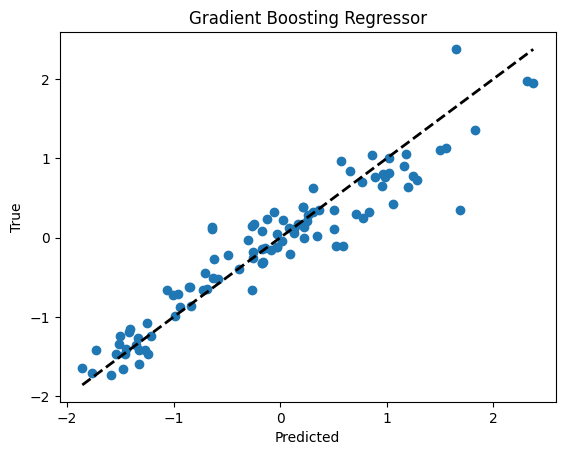

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr=gbr.predict(X_test)
# gbr_r2=gbr.score(X_test,y_test)

y_train_pred_gbr = gbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Gradient Boosting Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_gbr,squared=False),mean_squared_error(y_train, y_train_pred_gbr),
            mean_absolute_error(y_train, y_train_pred_gbr), r2_score(y_train, y_train_pred_gbr)))
print("""Gradient Boosting Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_gbr, squared=False),mean_squared_error(y_test, y_pred_gbr),
            mean_absolute_error(y_test, y_pred_gbr), r2_score(y_test, y_pred_gbr)))

plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Regressor")
plt.show()

##### **e) Extreme Gradient Boosting(XGBoost)**

In [152]:

import xgboost as xgb
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred_xgbr=xgbr.predict(X_test)
xgbr_r2=xgbr.score(X_test,y_test)
xgbr_r1=xgbr.score(X_train,y_train)

# print("Model \t\t\t\t\t\t Phase \t\t\t R2")

# print(" Extreme Gradient Boosting Regressor \t\t Train \t\t\t{:.3f}".format(xgbr_r1))

# print(" Extreme Gradient Boosting Regressor \t\t Test\t\t\t{:.3f}".format(xgbr_r2))

y_train_pred_xgbr = xgbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Extreme Gradient Boosting Regressor \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_xgbr,squared=False),mean_squared_error(y_train, y_train_pred_xgbr),
            mean_absolute_error(y_train, y_train_pred_xgbr), r2_score(y_train, y_train_pred_xgbr)))
print("""Extreme Gradient Boosting Regressor \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_xgbr, squared=False),mean_squared_error(y_test, y_pred_xgbr),
            mean_absolute_error(y_test, y_pred_xgbr), r2_score(y_test, y_pred_xgbr)))

Model					 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Extreme Gradient Boosting Regressor 	 Train 		 0.064 		 0.004 		0.026 		0.996
Extreme Gradient Boosting Regressor 	 Test 		 0.255 		 0.065 		0.165 		0.932


##### **f) Light Gradient Boosting Machine(LightGBM)**

In [153]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr=lgbmr.predict(X_test)
# lgbmr_r2=lgbmr.score(X_test,y_test)
# lgbmr_r1 = lgbmr.score(X_train, y_train)

# print("Model \t\t\t\t\t\t Phase \t\t\t R2")

# print(" Light Gradient Boosting Machine \t\t Train \t\t\t{:.3f}".format(lgbmr_r1))

# print(" Light Gradient Boosting Machine \t\t Test\t\t\t{:.3f}".format(lgbmr_r2))

y_train_pred_lgbmr = lgbmr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Light Gradient Boosting Machine \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_lgbmr,squared=False),mean_squared_error(y_train, y_train_pred_lgbmr),
            mean_absolute_error(y_train, y_train_pred_lgbmr), r2_score(y_train, y_train_pred_lgbmr)))
print("""Light Gradient Boosting Machine \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_lgbmr, squared=False),mean_squared_error(y_test, y_pred_lgbmr),
            mean_absolute_error(y_test, y_pred_lgbmr), r2_score(y_test, y_pred_lgbmr)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 927, number of used features: 8
[LightGBM] [Info] Start training from score 0.009573
Model					 Phase 		 RMSE 		 MSE 		 MAE 		 R2
Light Gradient Boosting Machine 	 Train 		 0.130 		 0.017 		0.084 		0.983
Light Gradient Boosting Machine 	 Test 		 0.243 		 0.059 		0.177 		0.938


##### **g) Categorical Boosting(CatBoost)**

In [154]:
import catboost as catb
from catboost import CatBoostRegressor
catbr = CatBoostRegressor()
catbr.fit(X_train, y_train)
y_pred_catbr=catbr.predict(X_test)
catbr_r1=catbr.score(X_train,y_train)
catbr_r2=catbr.score(X_test,y_test)

# print("\nModel \t\t\t\t\t\t Phase \t\t\t R2")
# print(" Categorical Boosting \t\t Train \t\t\t{:.3f}".format(catbr_r1))
# print(" Categorical Boosting \t\t Test\t\t\t{:.3f}".format(catbr_r2))

y_train_pred_catbr = catbr.predict(X_train)# pour obtenir les metriques sur les echhantillons entraines

# y_pred_abr = abr.predict(X_test)

#Afficher les differentes metriques pour chaque phase (entrainement et test)
print("Model\t\t\t Phase \t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Categorical Boosting \t Train \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
            mean_squared_error(y_train, y_train_pred_catbr,squared=False),mean_squared_error(y_train, y_train_pred_catbr),
            mean_absolute_error(y_train, y_train_pred_catbr), r2_score(y_train, y_train_pred_catbr)))
print("""Categorical Boosting \t Test \t\t {:.3f} \t\t {:.3f} \t\t{:.3f} \t\t{:.3f}""".format(
    mean_squared_error(y_test, y_pred_catbr, squared=False),mean_squared_error(y_test, y_pred_catbr),
            mean_absolute_error(y_test, y_pred_catbr), r2_score(y_test, y_pred_catbr)))

Learning rate set to 0.040456
0:	learn: 0.9780267	total: 87.3ms	remaining: 1m 27s
1:	learn: 0.9526081	total: 90.3ms	remaining: 45.1s
2:	learn: 0.9328785	total: 96.4ms	remaining: 32s
3:	learn: 0.9093300	total: 99.6ms	remaining: 24.8s
4:	learn: 0.8875484	total: 102ms	remaining: 20.2s
5:	learn: 0.8654736	total: 104ms	remaining: 17.2s
6:	learn: 0.8439899	total: 107ms	remaining: 15.1s
7:	learn: 0.8256199	total: 108ms	remaining: 13.4s
8:	learn: 0.8084291	total: 110ms	remaining: 12.1s
9:	learn: 0.7897514	total: 111ms	remaining: 11s
10:	learn: 0.7713156	total: 113ms	remaining: 10.1s
11:	learn: 0.7553193	total: 115ms	remaining: 9.46s
12:	learn: 0.7393054	total: 117ms	remaining: 8.92s
13:	learn: 0.7245613	total: 119ms	remaining: 8.39s
14:	learn: 0.7093264	total: 121ms	remaining: 7.92s
15:	learn: 0.6965446	total: 123ms	remaining: 7.54s
16:	learn: 0.6834992	total: 124ms	remaining: 7.18s
17:	learn: 0.6700626	total: 126ms	remaining: 6.9s
18:	learn: 0.6572719	total: 128ms	remaining: 6.63s
19:	learn: 